In [3]:
!pip install investpy
!pip install matplotlib
import investpy

search_results = investpy.search_quotes(text='yar',
                                        products=['stocks'],
                                        countries=['norway'],                                        
                                        n_results=10)
a=search_results[0].retrieve_historical_data(from_date='01/01/2021', to_date='18/03/2021')


     |████████████████████████████████| 4.4MB 34.5MB/s 
     |████████████████████████████████| 245kB 46.6MB/s 
     |████████████████████████████████| 6.3MB 38.1MB/s 
     |████████████████████████████████| 512kB 50.2MB/s 
  Created wheel for investpy: filename=investpy-1.0.6-cp37-none-any.whl size=4485151 sha256=9633c4b3a0d7ff12e514b0d267bdcfcfdd8367493b10eb6e98b538f8651d0249
  Stored in directory: /root/.cache/pip/wheels/13/5f/65/a9e30255faec3c0b7dd11b40fa1042c61c5b0cfbbb9797c474
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


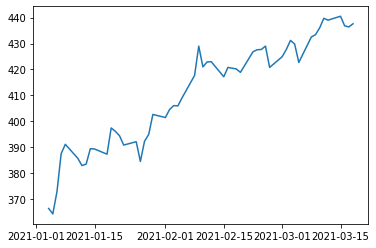

In [4]:
import matplotlib.pyplot as plt
plt.plot(a['High'])
plt.show()

In [82]:
import pandas as pd
import numpy as np

p=[('Klp Aksjeglobal Mer Samfunnsansvar', 176+125,1,'funds','norway'),
    ('Microsoft Corporation',97,8.5,'stocks','united states'),
    ('odin norge c',12,1,'funds','norway'),
    ('odin norden c',9.43,8.5,'funds','norway'),
    ('yar',30,1,'stocks','norway'),
    ('eqnr',50,1,'stocks','norway'),
    ('Schlumberger NV',353,8.5,'stocks','united states')
]

raw_values = []
for i,t in enumerate(p):
    search_results = investpy.search_quotes(text=t[0],
                                        products=[t[3]],
                                        countries=[t[4]],                                        
                                        n_results=10)
    a=search_results[0].retrieve_historical_data(from_date='03/03/2020', to_date='21/05/2021')    
    raw_values.append(a)
  
        


In [83]:
# Get unique dates
import pandas as pd
sm = None
highs = None
cm = pd.DataFrame()

a = raw_values[0]
u = raw_values[0].index
for a in raw_values[1:]:  
    u.append(a.index)
u = u.unique()
cm = pd.DataFrame(u)
col_names = ['Date']
for a,t in zip(raw_values, p):  
  ser = a['High']*t[2]*t[1]      
  cm=cm.merge(ser, on='Date')
  col_names.append(t[0])
cm.columns =  col_names # ['a','b','c','d','e','f','g','h']#





In [84]:
 
    # fig, axs = plt.subplots(7,2)
    
    # ser = a['High']*t[2]*t[1]         
    # av = np.convolve(ser, np.ones(4)/4, mode='valid')    
    # ser2 = [v if not np.isnan(v) else av[i] for i,v in enumerate(ser)]
    # ser = [v if not np.isnan(v) else av[i] for i,v in enumerate(ser)]
    # axs[i,0].plot(ser)
    # axs[i,1].plot(ser2)
    # cm[t[0]] = ser
    # if sm is None: 
    #     sm = ser        
    #     highs = ser
    # else:
    #     sm = sm + ser
    #     highs.append(ser)
 

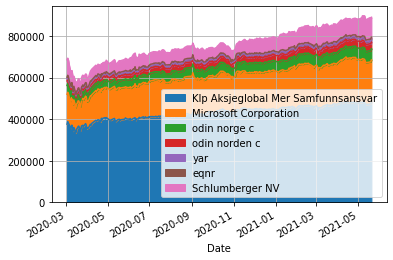

In [85]:

sb = cm
sb.set_index(['Date'],inplace=True)
sb.plot.area()
plt.grid()
plt.show()

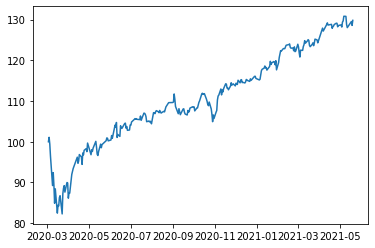

In [86]:
sm = cm.sum(axis=1)
sm = 100*sm/sm[0]
plt.plot(sm)
plt.show()